In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [ ]:
def getModel():
  #input gambar 500x500
  input_layer = tf.keras.Input(shape=(500, 500, 3), name='input')
  data_augmentation = tf.keras.Sequential(
    [
      tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
      # tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
      tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
    ]
  )   
  aug_layer = data_augmentation(input_layer)

  #layer convolution
  conv_layer = tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu')(aug_layer)
  conv_layer = tf.keras.layers.MaxPooling2D(2,2)(conv_layer)
  conv_layer = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(conv_layer)
  conv_layer = tf.keras.layers.MaxPooling2D(2,2)(conv_layer)
  conv_layer = tf.keras.layers.Dropout(0.25)(conv_layer)
  conv_layer = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(conv_layer)
  conv_layer = tf.keras.layers.MaxPooling2D(2,2)(conv_layer)
  flatten = tf.keras.layers.Flatten()(conv_layer)

  #hidden layer 1
  hidden1 = tf.keras.layers.Dense(256, activation='relu')(flatten)
  hidden1 = tf.keras.layers.Dropout(0.25)(hidden1)
  #output 1, Categori: building, bridge, road
  output_category = tf.keras.layers.Dense(3, activation='softmax',name="output_category")(hidden1)

  #Penggabungan dari output 1 dan flatten
  hidden2 = tf.keras.layers.Dense(512, activation='relu')(output_category)
  concat = tf.keras.layers.Concatenate()([hidden2, flatten])

  #hidden layer 2
  hidden3 = tf.keras.layers.Dense(128, activation='relu')(concat)

  #output 2, Level: minor, moderate, heavy
  output_level = tf.keras.layers.Dense(3, activation='softmax',name="output_level")(hidden3)
  
  #build model, input=Gambar output: [categori, level]
  model = tf.keras.Model(inputs=[input_layer], outputs=[output_category, output_level])

  return model

def getModel2():
  #input gambar 500x500
  input_layer = tf.keras.Input(shape=(500, 500, 3), name='input')
  
  #augmentation layer
  data_augmentation = tf.keras.Sequential(
    [
      tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
      # tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
      # tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
    ]
  )   
  aug_layer = data_augmentation(input_layer)

  #layer convolution
  conv_layer = tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500, 500, 3))(aug_layer)
  conv_layer = tf.keras.layers.MaxPooling2D(2,2)(conv_layer)
  conv_layer = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(conv_layer)
  conv_layer = tf.keras.layers.MaxPooling2D(2,2)(conv_layer)
  conv_layer = tf.keras.layers.Dropout(0.25)(conv_layer)
  conv_layer = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(conv_layer)
  conv_layer = tf.keras.layers.MaxPooling2D(2,2)(conv_layer)
  flatten = tf.keras.layers.Flatten()(conv_layer)

  #hidden layer 1
  hidden1 = tf.keras.layers.Dense(512, activation='relu')(flatten)
  hidden1 = tf.keras.layers.Dropout(0.25)(hidden1)
  output_category = tf.keras.layers.Dense(3, activation='softmax', name='category')(hidden1)
  output_level = tf.keras.layers.Dense(3, activation='softmax', name='level')(hidden1)


  
  model = tf.keras.Model(inputs=[input_layer], outputs=[output_category, output_level])

  return model

model = getModel2() 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 500, 500, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 498, 498, 16) 448         sequential[0][0]                 
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 249, 249, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

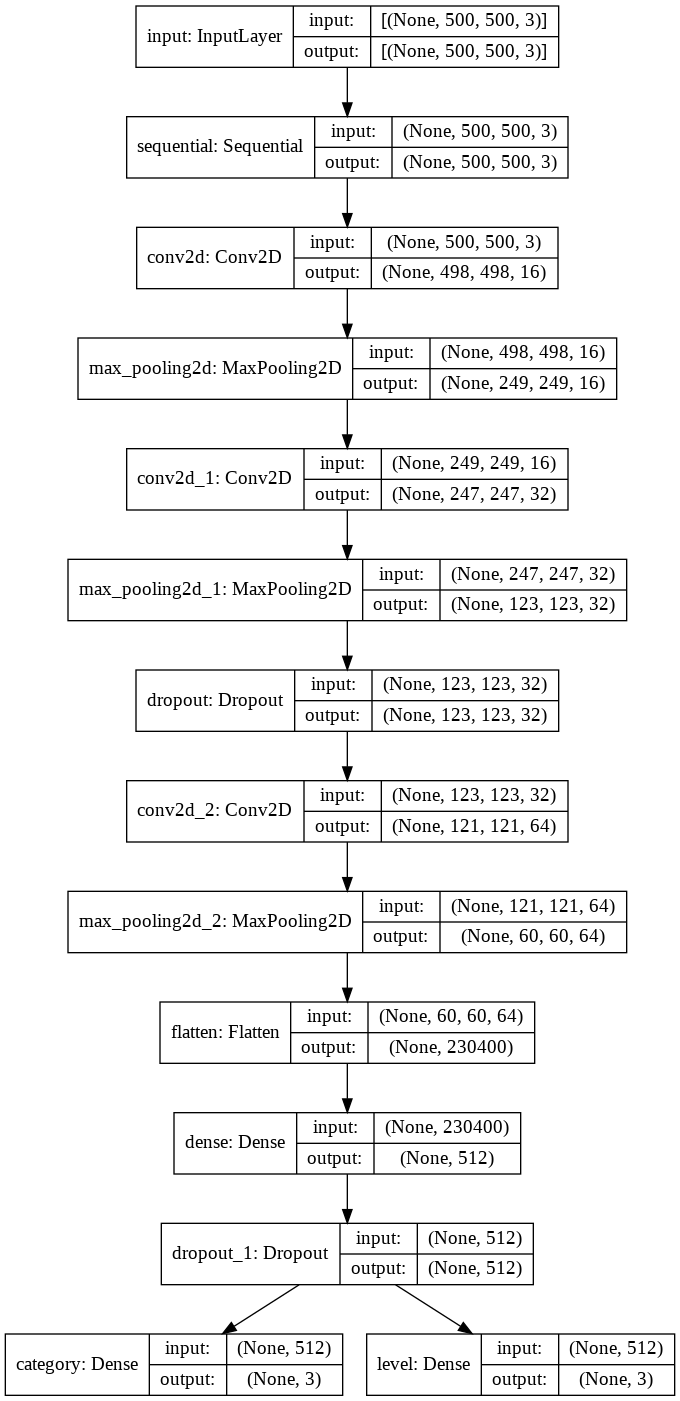

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!rm -rf Damaged-Building-Dataset
!git clone https://github.com/aw09/Damaged-Building-Dataset.git

Cloning into 'Damaged-Building-Dataset'...
remote: Enumerating objects: 3236, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 3236 (delta 0), reused 1 (delta 0), pack-reused 3231
Receiving objects: 100% (3236/3236), 115.87 MiB | 38.72 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Checking out files: 100% (6857/6857), done.


In [ ]:
!cp -a Damaged-Building-Dataset/Label/heavy_building/. /content/img-dataset
!cp -a Damaged-Building-Dataset/Label/moderate_building/. /content/img-dataset
!cp -a Damaged-Building-Dataset/Label/minor_building/. /content/img-dataset

!cp -a Damaged-Building-Dataset/Label/heavy_road/. /content/img-dataset
!cp -a Damaged-Building-Dataset/Label/moderate_road/. /content/img-dataset
!cp -a Damaged-Building-Dataset/Label/minor_road/. /content/img-dataset

!cp -a Damaged-Building-Dataset/Label/heavy_bridge/. /content/img-dataset
!cp -a Damaged-Building-Dataset/Label/moderate_bridge/. /content/img-dataset
!cp -a Damaged-Building-Dataset/Label/minor_bridge/. /content/img-dataset

In [ ]:
from os import walk
import pandas as pd
import os

def makeDataset(string):
  mypath = '/content/Damaged-Building-Dataset/Label'
  path = 'Label'

  mypath = os.path.join(mypath, string)
  path = os.path.join(path, string)

  string = string.split('_')
  category = string[1]
  level = string[0]

  f = []
  for (dirpath, dirnames, filenames) in walk(mypath):
      f.extend(filenames)
      break

  t = []
  for i in f:
    t.append(path+i)

  values = {'Category': category, 'Level': level}
  ds = pd.DataFrame(columns=['Category','Level'])
  ds['path'] = f
  ds = ds.fillna(value=values)
  return ds


In [ ]:
heavy_bridge = makeDataset('heavy_bridge')
heavy_building = makeDataset('heavy_building')
heavy_road = makeDataset('heavy_road')
minor_bridge = makeDataset('minor_bridge')
minor_building = makeDataset('minor_building')
minor_road = makeDataset('minor_road')
moderate_road = makeDataset('moderate_road')
moderate_building = makeDataset('moderate_building')
moderate_bridge = makeDataset('moderate_bridge')

In [ ]:
dataset = pd.concat([heavy_bridge, heavy_building, heavy_road, moderate_bridge, moderate_building, moderate_road, minor_bridge, minor_building, minor_road])
df = dataset.copy()
df = df.reset_index(drop=True)
# df = df.drop([694, 1436])
# df = df.drop([694, 1436])
# df = df.groupby(['Category', 'Level'], as_index=False).apply(lambda x: x.sample(130, replace=True)).reset_index()
# df = df.drop(['level_0', 'level_1'], axis=1)
# df

In [ ]:
# df2 = pd.read_csv('df.csv')
# list(set(dataset.path) - set(df.path))

In [ ]:
import numpy as np
import os

files = df.path
files = files.map(lambda x: os.path.join("/content/img-dataset", x))
category = df.Category
level = df.Level

def load(file_path):
  img = tf.io.read_file(file_path)
  img = tf.image.decode_png(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, size=(500, 500))
  return img

def label(string):
  categories = ['building', 'road', 'bridge']
  levels = ['heavy', 'moderate', 'minor']
  res = tf.cast([tf.equal(string, categories[0]) or tf.equal(string, levels[0]), 
                 tf.equal(string, categories[1]) or tf.equal(string, levels[1]), 
                 tf.equal(string, categories[2]) or tf.equal(string, levels[2])], 
                tf.int32)
  return res

batch_size = 100
files = tf.data.Dataset.from_tensor_slices(files).map(lambda x: load(x) )
category = tf.data.Dataset.from_tensor_slices(category).map(lambda x: label(x))
level = tf.data.Dataset.from_tensor_slices(level).map(lambda x: label(x))
ds = tf.data.Dataset.zip((files, (category, level)))
ds = ds.shuffle(buffer_size=300, reshuffle_each_iteration=True).batch(batch_size=batch_size)
# next(iter(ds))
ds

<BatchDataset shapes: ((None, 500, 500, 3), ((None, 3), (None, 3))), types: (tf.float32, (tf.int32, tf.int32))>

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs=50

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    acc = 0.72
    param = 'accuracy'
    if(logs.get(param)>acc):
      print("\nReached "+str(logs.get(param)*100)+"% accuracy so cancelling training!")
      self.model.stop_training = True
  def on_train_batch_end(self, batch, logs={}):
        keys = list(logs.keys())
        print("...Training: end of batch {}".format(batch))
stopCallbacks = myCallback()

history = model.fit(
  ds,
  # validation_data=ds,
  # callbacks=[stopCallbacks],
  epochs=epochs
)

Epoch 1/50
 5/19 [======>.......................] - ETA: 5:26 - loss: 88.8788 - category_loss: 73.1534 - level_loss: 15.7254 - category_accuracy: 0.3640 - level_accuracy: 0.7940

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

def plotting(hist):
  print(hist.history.keys())
  #  "Accuracy"
  plt.plot(hist.history['category_accuracy'])
  plt.plot(hist.history['level_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['category', 'level'], loc='upper left')
  plt.show()
  # "Loss"
  plt.plot(hist.history['category_loss'])
  plt.plot(hist.history['level_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['category', 'level'], loc='upper left')
  plt.show()
plotting(history)

In [ ]:
import datetime
date = datetime.datetime.today()
version = str(date.day)+'.'+str(date.month)
modelpath = '/content/damage_classification-'+version+'.h5'
model.save(modelpath)

In [ ]:
from google.colab import files
from keras.preprocessing import image
# uploaded = files.upload()
# for fn in uploaded.keys():
 
  # predicting images
path = '/content/1bcc87062e9f4d70b030f1962cd20b07_Meniti20Jembatan20Rusak_01.jpg'
img = image.load_img(path, target_size=(500,500))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes)

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = 'arjuna-project'
!gcloud config set project {project_id}
# !gsutil -m cp /content/damage_classification-2.6.h5 gs://projectlist1/Capstone

Updated property [core/project].


In [ ]:
!gsutil -m cp gs://projectlist1/model/damage_classification-2.6.h5 ./model.h5

Copying gs://projectlist1/model/damage_classification-2.6.h5...
/ [1/1 files][  1.3 GiB/  1.3 GiB] 100% Done  43.6 MiB/s ETA 00:00:00           
Operation completed over 1 objects/1.3 GiB.                                      


In [ ]:
from google.cloud import storage
import os
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/adc.json"
model = tf.keras.models.load_model('./model.h5')

In [ ]:
def returnLabel(testLabel):
  categories = ['building', 'road', 'bridge']
  levels = ['heavy', 'moderate', 'minor']
  category = testLabel[0][0]
  level = testLabel[1][0]
  label = {}
  for val_c, label_c in zip(category, categories):
    for val_l, label_l in zip(level,levels) :
      index = label_l+'_'+label_c
      value = (val_c+val_l)/2.0
      # print(index)
      # print(value)
      label[index] = float("{:.2f}".format(value))
      # label[index] = value
  return label

def predict(filename):
  if True:
    # filename = request.args.get('path')

    storage_client = storage.Client("[arjuna-project]")
    bucket = storage_client.get_bucket('projectlist1')
    blob = bucket.blob(filename)
    path_download = "temp.jpg"
    blob.download_to_filename(path_download)

    img = image.load_img(path_download, target_size=(500,500))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
    # print(classes[1][0])
    result = returnLabel(classes)
    #blob.metadata = result
    #blob.patch()
    # print(blob.metadata)
    #return blob.metadata
    return result
  else:
    return 'Use POST to predict'
predict('test3.jpg')

{'heavy_bridge': 0.0,
 'heavy_building': 0.0,
 'heavy_road': 0.5,
 'minor_bridge': 0.5,
 'minor_building': 0.5,
 'minor_road': 1.0,
 'moderate_bridge': 0.0,
 'moderate_building': 0.0,
 'moderate_road': 0.5}

1
heavy_building
